In [10]:
import matplotlib.pyplot as plt
from density_estimation import LongishEnv, new_VAE, collect_samples, sample
import numpy as np
import seaborn as sns
%matplotlib inline

In [22]:
env = LongishEnv()
buffer = collect_samples(env=env, num_episodes=500)

In [12]:
VAE, get_state_density = new_VAE(
    state_space_dim=env.observation_space.shape[0],
    batch_size=32,
    samples_generator=lambda n: sample(buffer, n)
)
VAE.load_weights("density-model-ckpt/")

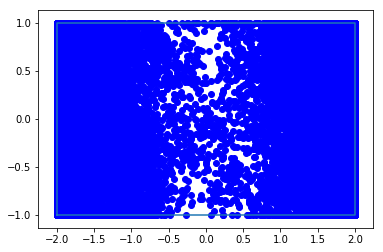

In [23]:
samples = buffer
env.render("human", more_pts=dict(blue=samples))

In [24]:
probs = get_state_density(samples)

In [25]:
ws = (1 / probs).numpy().astype(np.float64)
resamples_indices = np.random.choice(range(len(samples)), size=len(samples), replace=True, p=ws / sum(ws))
resamples = samples[resamples_indices]

/home/tomasruiz/miniconda3/envs/dads-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


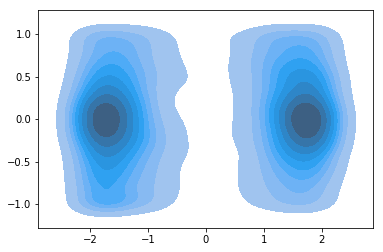

In [26]:
fig, ax = plt.subplots()
sns.kdeplot(*samples.T, ax=ax, fill=True)

/home/tomasruiz/miniconda3/envs/dads-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


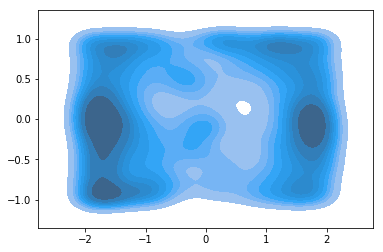

In [27]:
fig, ax = plt.subplots()
sns.kdeplot(*resamples.T, ax=ax, fill=True)